<a href="https://colab.research.google.com/github/Alvaro-Fdz-Glz/Neural_Networks_Pytorch/blob/master/Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Homework 6: Dense Neural Networks with Pytorch

------------------------------------------------------
*Machine Learning, Master in Big Data Analytics, 2018-2019*

*Pablo M. Olmos olmos@tsc.uc3m.es*

------------------------------------------------------

In this homework you will deploy a simple Neural Network binary classifier for the Credit Default database from the [UCI repository](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients). The goal is to predict the probability of a default credit payment of different purchases, according to features such as amount of the given credit, history of past payment, or payment delay for nine months.

Make sure you have reviewed the material of the [Pytorch Facebook Udacity course](https://github.com/udacity/deep-learning-v2-pytorch.git), particularly the assigments in the `intro_to_pytorch` folder.

The homework is completely open. The following steps must be fullfilled:

- Download the dataset. 
- Check out if there are categorical or nominal variables. If so, replace them by their [one-hot encoding representation](https://towardsdatascience.com/ml-intro-5-one-hot-encoding-cyclic-representations-normalization-6f6e2f4ec001). You can use the pandas method [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html). Split in train (60%), validation (20%), and test (20%) sets. Normalize real variables in both sets **2 points**.
- Create a pytorch model class that defines a Neural Network with at two dense layers, non-linear activations at your choice and the appropiate final activation function for a binary classifier. Define the loss function, the batch size and the optimizer to be used. **3 points**.
- Train the model using mini-batch stochastic gradiend descent. Plot the evolution of both train and validation error rate during training. **3 points**.
- Define a new Neural Network model with four layers. Introduce Dropout as a regularization technique. Plot the evolution of both train and validation error rate during training **2 points**.

**Note:** there are tons of parameters that should be selected by cross-validation (number of hidden units per layer, activation functions, mini-batch size, etc ...). Do not worry about this issue, just make your own choice and compare both models. The goal of this homework is that you learn how to use pytorch, not to really make fine-tunning of Neural Networks.

**Note-2:** Load the dataset with pandas, export to numpy and then to a pytorch tensor with the method `torch.from_numpy()`. E.g.

`import torch`

`X_train_torch = torch.from_numpy(X_train)`

`y_train_torch = torch.from_numpy(y_train.astype(np.int64)`  


**Note-3**: You can compare the performance achieved by the Neural Network with other methods in Table 1 of this [paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719)

Check out if there are categorical or nominal variables. If so, replace them by their one-hot encoding representation. You can use the pandas method get_dummies. Split in train (60%), validation (20%), and test (20%) sets. Normalize real variables in both sets 2 points.

In [0]:
import pandas as pd

pd.read_excel
# https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel

<function pandas.io.excel.read_excel>

In [0]:

# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.

#https://drive.google.com/open?id=



In [0]:
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '15Li8uQEbtW6Do4yZf4QUCWsD2nuhUSAn'
downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))


downloaded.GetContentFile('Data.csv')  
df1 = pd.read_excel('Data.csv',header=1)
df1=df1.drop('ID',axis=1)
label=list(df1)[-1]

In [0]:
import numpy as np
import torch

arr=np.arange(df1.shape[0])
np.random.shuffle(arr)

partition={'train':list(arr[0:18000]),'validation':list(arr[18000:24000]),'test':list(arr[24000::])}
y=df1[label]

labels={k:torch.tensor(y[k],dtype=torch.float) for k in df1.index}


X=df1.drop(columns=label)
print(df1.shape)
X=pd.get_dummies(X,columns=["SEX","EDUCATION","MARRIAGE"])
len(labels)

(30000, 24)


30000

In [0]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

ssc=StandardScaler()
X.iloc[partition['train'],np.arange(20)] = ssc.fit_transform(X.iloc[partition['train'],np.arange(20)])
X.iloc[partition['validation'],np.arange(20)] = ssc.transform(X.iloc[partition['validation'],np.arange(20)])
X.iloc[partition['test'],np.arange(20)] = ssc.transform(X.iloc[partition['test'],np.arange(20)])



In [0]:
X_tensor=torch.tensor(np.array(X))
X_tensor=X_tensor.float()
y_tensor=torch.tensor(np.array(y))

y_tensor=y_tensor.float()



Create a pytorch model class that defines a Neural Network with at two dense layers, non-linear activations at your choice and the appropiate final activation function for a binary classifier. Define the loss function, the batch size and the optimizer to be used. 3 points.

In [0]:
import torch
from torch.utils import data

import torch
from torch.utils import data

class Dataset(data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, list_IDs, labels, dat):
        'Initialization'
        self.labels = labels
        self.list_IDs = list_IDs
        self.dat = dat

  def __len__(self):
        'Denotes the total number of samples'
        return len(self.list_IDs)

  def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        ID = self.list_IDs[index]

        # Load data and get label
        X = self.dat[ID] #torch.load('data/' + ID + '.pt')
        y = self.labels[ID]

        return X, y

In [0]:
params = {'batch_size': 100,'shuffle': True,'num_workers': 6}

training_set = Dataset(partition['train'],labels,dat=X_tensor)
training_generator = data.DataLoader(training_set,**params)

validation_set = Dataset(partition['validation'],labels,dat=X_tensor)
validation_generator = data.DataLoader(validation_set,**params)

test_set = Dataset(partition['test'],labels,dat=X_tensor)
test_generator = data.DataLoader(test_set,**params)

In [0]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(33, 40)
        self.fc2 = nn.Linear(40, 1)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(x)
        
        return x
      
model = Classifier()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)




Train the model using mini-batch stochastic gradiend descent. Plot the evolution of both train and validation error rate during training. 3 points.

In [0]:
# TODO: Train the network here
epochs = 300

train_losses, test_losses = [], []

for e in range(epochs):
  running_loss = 0
  for images, labels_to_train in training_generator:
      log_ps = model(images)
      loss = criterion(log_ps,labels_to_train)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      running_loss += loss.item()

  else:
      test_loss = 0
      accuracy = 0

      # Turn off gradients for validation, saves memory and computations
      with torch.no_grad():
          for images, labels_validation in validation_generator:
              log_ps = model(images)
              test_loss += criterion(log_ps, labels_validation)

  train_losses.append(running_loss/len(training_generator))
  test_losses.append(test_loss/len(validation_generator))
  
  model.train()
  
  print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(training_generator)),
              "Validation Loss: {:.3f}.. ".format(test_loss/len(validation_generator)))

Epoch: 1/300..  Training Loss: 0.692..  Validation Loss: 0.689.. 
Epoch: 2/300..  Training Loss: 0.688..  Validation Loss: 0.687.. 
Epoch: 3/300..  Training Loss: 0.687..  Validation Loss: 0.687.. 
Epoch: 4/300..  Training Loss: 0.686..  Validation Loss: 0.687.. 
Epoch: 5/300..  Training Loss: 0.686..  Validation Loss: 0.686.. 
Epoch: 6/300..  Training Loss: 0.686..  Validation Loss: 0.686.. 
Epoch: 7/300..  Training Loss: 0.686..  Validation Loss: 0.686.. 
Epoch: 8/300..  Training Loss: 0.685..  Validation Loss: 0.686.. 
Epoch: 9/300..  Training Loss: 0.685..  Validation Loss: 0.686.. 
Epoch: 10/300..  Training Loss: 0.685..  Validation Loss: 0.686.. 
Epoch: 11/300..  Training Loss: 0.685..  Validation Loss: 0.686.. 
Epoch: 12/300..  Training Loss: 0.685..  Validation Loss: 0.687.. 
Epoch: 13/300..  Training Loss: 0.685..  Validation Loss: 0.686.. 
Epoch: 14/300..  Training Loss: 0.685..  Validation Loss: 0.687.. 
Epoch: 15/300..  Training Loss: 0.685..  Validation Loss: 0.686.. 
Epoc

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

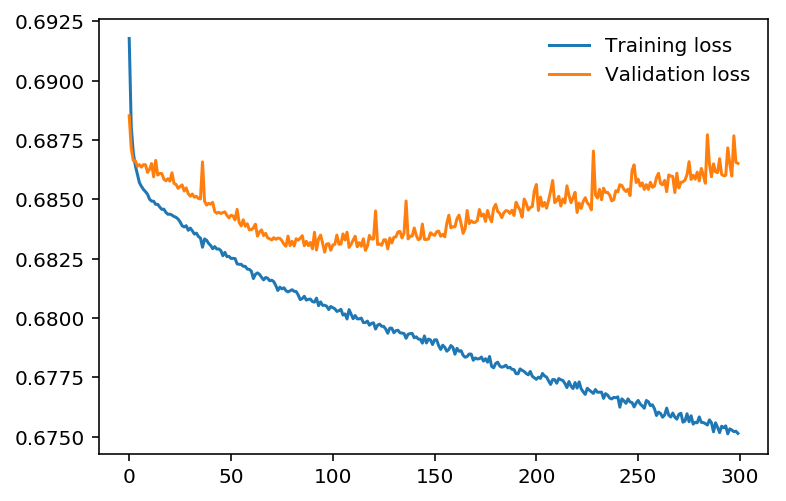

In [0]:

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [0]:
correct = 0
total = 1
with torch.no_grad():
    for data in test_generator:
        images, labels_test = data
        outputs = model.forward(images)
        #print(outputs>0.5)
        outputs=torch.tensor(outputs>0.5)
        temp=(labels_test==outputs.view(1,-1).float()).sum()
       
        #print(predicted)
        total += labels_test.size(0)
        correct += temp

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 81 %


Define a new Neural Network model with four layers. Introduce Dropout as a regularization technique. Plot the evolution of both train and validation error rate during training 2 points.

In [0]:
import torch.nn.functional as F

class Classifier_2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(33, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 40)
        self.fc4 = nn.Linear(40, 1)
        self.dropout = nn.Dropout(p=0.3)


    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0],-1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = self.dropout(F.relu(self.fc4(x)))
        x = F.sigmoid(x)
        
        return x

model_four_layers = Classifier_2()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [0]:
# TODO: Train the network here
epochs = 400

train_losses, test_losses = [], []

for e in range(epochs):
  model_four_layers.train()
  running_loss = 0
  for images, labels_to_train in training_generator:
      log_ps = model_four_layers(images)
      loss = criterion(log_ps,labels_to_train)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      #print(model_four_layers.forward(images))

      running_loss += loss.item()

  else:
      test_loss = 0
      accuracy = 0

      # Turn off gradients for validation, saves memory and computations
      with torch.no_grad():
          for images, labels_validation in validation_generator:
              log_ps = model_four_layers(images)
              test_loss += criterion(log_ps, labels_validation)

  train_losses.append(running_loss/len(training_generator))
  test_losses.append(test_loss/len(validation_generator))
  
   
  #print("Epoch: {}/{}.. ".format(e+1, epochs),
  #            "Training Loss: {:.3f}.. ".format(running_loss/len(training_generator)),
  #            "Validation Loss: {:.3f}.. ".format(test_loss/len(validation_generator)))
  
  
  correct = 0
  total = 0
  with torch.no_grad():
      for data in test_generator:
          images, labels_test = data
          outputs = model_four_layers.forward(images)
          #print(outputs>0.5)
          outputs=torch.tensor(outputs>0.5)
          temp=(labels_test==outputs.view(1,-1).float()).sum()

          _, predicted = torch.max(outputs.data, 1)

          #print(predicted)
          total += labels_test.size(0)
          correct += temp

  print('Accuracy of the network on the test images: %d %%' % (
      100 * correct / total))
  
    

Accuracy of the network on the test images: 77 %
Accuracy of the network on the test images: 77 %
Accuracy of the network on the test images: 77 %
Accuracy of the network on the test images: 77 %
Accuracy of the network on the test images: 77 %
Accuracy of the network on the test images: 77 %
Accuracy of the network on the test images: 77 %
Accuracy of the network on the test images: 77 %
Accuracy of the network on the test images: 77 %
Accuracy of the network on the test images: 77 %
Accuracy of the network on the test images: 77 %
Accuracy of the network on the test images: 77 %
Accuracy of the network on the test images: 77 %
Accuracy of the network on the test images: 77 %
Accuracy of the network on the test images: 77 %
Accuracy of the network on the test images: 77 %
Accuracy of the network on the test images: 77 %
Accuracy of the network on the test images: 77 %
Accuracy of the network on the test images: 77 %
Accuracy of the network on the test images: 77 %
Accuracy of the netw

In [0]:

correct = 0
total = 1
with torch.no_grad():
    for data in test_generator:
        images, labels_test = data
        outputs = model_four_layers.forward(images)
        #print(outputs>0.5)
        outputs=torch.tensor(outputs>0.5)
        temp=(labels_test==outputs.view(1,-1).float()).sum()

        _, predicted = torch.max(outputs.data, 1)
        
        #print(predicted)
        total += labels_test.size(0)
        correct += temp

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 40 %


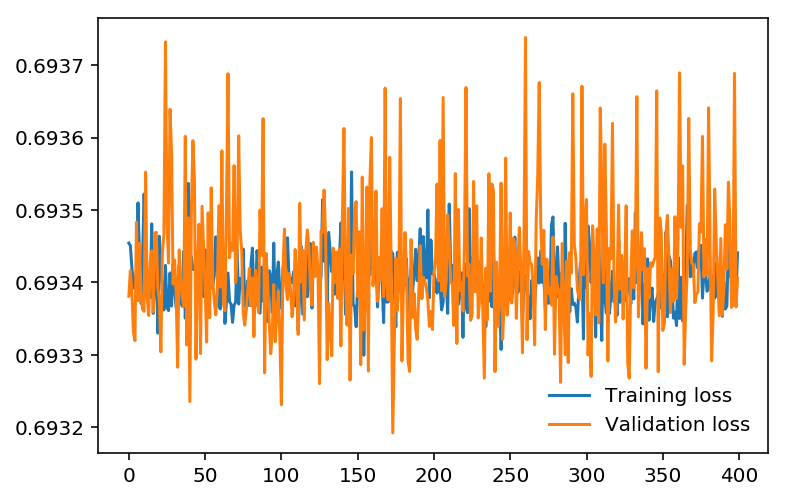

In [0]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)